# Times University ranking dataset analysis

In this codealong we are going to analyze a ranking of universities using regression. Specifically, we are going to **predict the university ranking** with the provided predictors.

---

The information provided in the csv contains:

- **world_rank** - world rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250).
- **university_name** - name of university.
- **country** - country of each university.
- **teaching** - university score for teaching (the learning environment).
- **international** - university score international outlook (staff, students, research).
- **research** - university score for research (volume, income and reputation).
- **citations** - university score for citations (research influence).
- **income** - university score for industry income (knowledge transfer).
- **total_score** - total score for university, used to determine rank.
- **num_students** - number of students at the university.
- **student_staff_ratio** - Number of students divided by number of staff.
- **international_students** - Percentage of students who are international.
- **female_male_ratio** - Female student to Male student ratio.
- **year** - year of the ranking (2011 to 2016 included).

We are going to predict the **total score**, which directly corresponds to the ranking.

---

### ONLY THE DATA PATH IS PROVIDED!

The analysis is up to you. This is an open ended practice. You are expected to:

- Load the packages you need to do analysis
- Perform EDA on variables of interest
- Form a hypothesis or hypotheses on what is important for the score
- Check your data for problems, clean and munge data into correct formats
- Create new variables from columns if necessary
- Perform statistical analysis with regression and describe the results

---

I will obviously be there in class to help, but if you do not know how to do something **I expect you to check documentation first.** I look up things in documentation all the time. 

**You are not expected to know how to do things by heart. Knowing how to effectively look up the answers on the internet is a critical skill for data scientists!**

In [1]:
uni_data_path = './dataset/timesData.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
unidata = pd.read_csv(uni_data_path)

In [4]:
unidata.head(1)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011


In [5]:
def converter(x):
    try:
        return float(x)
    except:
        return np.nan

cols = ['international', 'income']

for col in cols:
    unidata[col] = map(converter, unidata[col].values)

# unidata['total_score'] = map(converter, unidata.total_score.values)
# unidata[cols] = map(converter, )

In [6]:
unidata.num_students.values[0:20]

array(['20,152', '2,243', '11,074', '15,596', '7,929', '18,812', '19,919',
       '36,186', '15,060', '11,751', '38,206', '14,221', '15,128',
       '21,424', '18,178', '41,786', '66,198', '25,055', '20,376', '11,885'], dtype=object)

In [11]:
unidata['num_students'] = [str(x).replace(',','') for x in unidata['num_students'].values]

In [12]:
unidata.num_students.values[0:20]

array(['20152', '2243', '11074', '15596', '7929', '18812', '19919',
       '36186', '15060', '11751', '38206', '14221', '15128', '21424',
       '18178', '41786', '66198', '25055', '20376', '11885'], dtype=object)

In [17]:
unidata['num_students'] = map(converter, unidata['num_students'].values)



[ nan  nan  nan  nan  nan  nan  nan  nan  nan]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2594 non-null float64
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2385 non-null float64
total_score               2603 non-null object
num_students              3 non-null float64
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(7), int64(1), object(6)
memory usage: 284.8+ KB


In [6]:
unidata.dtypes


world_rank                 object
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [7]:
unidata['income']=map(converter,unidata.income.values)
print unidata.income.values[0:10]

[ 34.5  83.7  87.5  64.3   nan  57.   73.5   nan  92.9   nan]


In [8]:
unidata['country'].unique()

array(['United States of America', 'United Kingdom', 'Switzerland',
       'Canada', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
       'Australia', 'China', 'France', 'Sweden', 'Germany',
       'Republic of Ireland', 'Finland', 'Taiwan', 'South Africa',
       'Turkey', 'Netherlands', 'Belgium', 'Denmark', 'Norway', 'Spain',
       'New Zealand', 'Egypt', 'Austria', 'Israel', 'Brazil', 'Italy',
       'Russian Federation', 'Greece', 'Iceland', 'Czech Republic',
       'India', 'Poland', 'Iran', 'Portugal', 'Thailand', 'Chile',
       'Estonia', 'Saudi Arabia', 'Mexico', 'Colombia', 'Macau', 'Morocco',
       'Luxembourg', 'Unisted States of America', 'Cyprus',
       'Unted Kingdom', 'Uganda', 'Malaysia', 'Lebanon', 'Romania',
       'Slovenia', 'Pakistan', 'Hungary', 'United Arab Emirates',
       'Belarus', 'Serbia', 'Slovakia', 'Bangladesh', 'Ghana', 'Nigeria',
       'Indonesia', 'Jordan', 'Latvia', 'Kenya', 'Argentina', 'Qatar',
       'Oman', 'Ukraine', 'Lithuania'], dtyp

In [9]:
unidata['country'] = unidata['country'].map(lambda val: (val.replace('Unisted States of America', 'United States of America')))

TypeError: Could not convert 96.196.095.694.391.291.290.686.483.983.479.579.379.278.478.076.575.375.175.073.873.873.272.971.070.769.269.068.667.067.066.966.566.065.965.064.764.664.264.063.062.761.461.260.760.359.759.559.559.159.159.058.958.358.057.957.857.757.757.357.357.056.656.556.156.056.055.655.455.455.355.255.155.054.854.654.654.554.454.454.454.354.254.053.453.453.353.352.752.652.552.352.252.252.152.051.851.851.651.651.451.451.351.251.251.251.151.050.750.450.250.050.049.949.849.749.649.449.049.049.048.848.548.548.548.348.247.747.647.547.247.247.046.946.946.946.846.746.546.446.246.294.893.993.993.692.992.492.390.789.889.185.884.983.282.881.678.477.477.477.076.576.275.875.574.974.373.173.072.372.172.071.971.271.270.969.369.067.666.366.065.765.665.664.964.864.664.264.063.263.062.462.062.061.961.761.561.161.060.960.860.460.359.659.559.058.758.657.457.457.357.056.956.856.456.055.755.455.255.155.054.854.754.554.554.454.253.953.753.653.453.253.153.153.052.952.852.552.252.151.451.351.251.151.151.050.850.450.450.150.049.949.949.949.849.749.749.549.249.049.047.947.747.647.547.447.347.047.046.946.846.746.646.646.646.246.146.046.045.945.945.945.845.845.745.745.445.245.145.045.044.644.644.644.544.244.144.143.843.643.643.643.443.243.143.043.042.942.942.842.742.642.542.441.641.541.541.4-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------95.593.793.793.693.192.792.690.690.589.286.685.685.583.383.182.682.281.581.279.978.878.878.377.977.577.376.976.175.775.675.675.475.273.173.072.872.472.471.870.770.470.169.468.967.167.066.866.866.366.266.165.965.965.865.765.765.164.464.464.164.063.263.262.962.962.562.061.761.661.461.360.760.560.360.159.859.659.459.159.058.858.858.658.458.358.358.257.957.757.557.557.257.156.856.656.656.556.456.256.256.255.855.655.555.355.255.054.954.854.754.454.454.454.053.753.753.653.653.653.553.253.253.153.153.052.952.952.852.852.352.152.152.051.951.751.551.551.351.151.150.950.550.550.550.350.250.250.049.749.549.449.249.049.048.948.848.848.848.848.648.648.548.248.048.048.047.947.947.747.347.347.146.946.946.746.746.646.446.2-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------94.993.993.993.893.092.792.389.887.587.484.583.781.079.379.279.178.377.677.176.476.073.472.472.271.671.170.869.868.468.268.167.867.767.667.567.467.465.365.265.064.564.464.263.563.563.263.263.263.162.962.562.362.061.761.359.959.959.859.859.459.259.159.059.058.858.157.757.757.256.856.756.356.156.156.155.955.955.555.355.255.054.754.654.554.153.653.552.952.952.652.652.552.452.452.452.352.352.252.052.051.951.851.851.751.751.751.651.651.651.651.251.251.151.050.850.550.550.350.350.250.150.150.049.749.649.549.549.449.249.149.049.048.948.948.748.748.548.548.448.348.047.847.547.447.447.247.046.746.746.646.646.646.646.446.346.246.246.146.046.045.945.845.845.745.645.545.445.345.345.245.245.145.045.044.944.844.844.744.644.544.344.3-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------94.393.393.292.992.091.990.989.587.587.587.184.683.081.080.979.979.479.379.278.776.174.373.373.272.872.371.971.971.971.871.270.970.970.470.069.969.669.468.667.566.866.565.965.265.164.864.764.564.564.163.763.763.662.962.862.762.262.261.961.361.261.161.060.759.859.659.259.159.058.958.458.458.258.158.057.957.657.356.956.956.656.556.456.456.256.156.155.555.355.355.254.654.654.654.353.953.953.953.953.853.853.753.753.653.653.453.453.453.153.052.952.852.752.752.752.652.652.552.552.452.152.051.951.951.951.651.451.451.251.151.050.950.950.950.550.550.450.350.250.250.150.049.949.749.349.249.149.149.149.049.048.648.348.248.148.148.148.147.947.847.847.747.747.547.547.347.147.147.047.046.946.946.946.846.746.646.646.646.546.346.246.246.046.045.945.745.645.6-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------95.294.293.992.892.091.690.189.188.387.987.687.487.287.185.885.284.083.982.782.482.381.380.379.579.278.277.577.377.276.175.675.475.374.874.574.472.672.272.272.172.071.171.071.070.370.070.069.969.769.669.569.469.068.268.168.167.867.267.067.066.666.466.165.965.965.765.564.363.663.563.262.562.462.361.961.961.761.561.361.261.061.060.760.560.460.159.959.959.759.759.759.558.858.858.658.558.058.057.957.957.957.857.857.757.757.757.657.557.257.257.157.057.056.956.756.656.256.156.156.056.055.955.955.855.855.755.655.455.455.355.355.154.854.754.554.554.454.354.254.153.953.953.853.353.052.952.952.952.852.552.452.352.252.152.152.051.951.951.751.251.251.151.151.151.151.151.051.050.950.850.650.650.550.350.250.250.150.150.149.949.949.949.849.749.649.649.549.449.449.349.249.249.148.948.8---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- to numeric

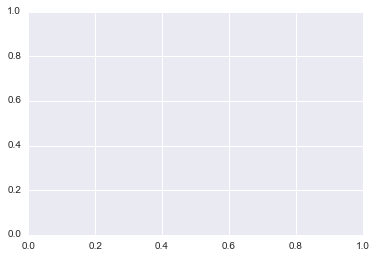

In [10]:
# sns.plot.scatter(x ='teaching', y ='world_rank', data = unidata)
sns.regplot(x="total_score", y="income", data= unidata)

In [11]:
year_count = unidata.year.value_counts()
year_count

2016    800
2012    402
2015    401
2013    400
2014    400
2011    200
Name: year, dtype: int64

In [13]:
#mask_2016 = unidata['year'] == 2016
#sns.regplot(x="total_score", y="income", data= unidata[mask_2016])

In [16]:
unidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2594 non-null float64
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2385 non-null float64
total_score               2603 non-null object
num_students              2603 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(6), int64(1), object(7)
memory usage: 284.8+ KB


In [19]:
unidata['total_score'] = map(converter, unidata.total_score.values)
unidata.total_score.unique()

array([ 96.1,  96. ,  95.6,  94.3,  94.2,  91.2,  91.1,  90.6,  89.5,
        87.7,  86.9,  86.4,  83.9,  83.4,  82. ,  81. ,  79.5,  79.3,
        79.2,  78.4,  78. ,  76.5,  75.9,  75.6,  75.3,  75.1,  75. ,
        73.8,  73.2,  73. ,  72.9,  71.7,  71. ,  70.7,  69.9,  69.5,
        69.2,  69. ,  68.6,  67. ,  66.9,  66.5,  66. ,  65.9,  65.6,
        65.2,  65. ,  64.9,  64.7,  64.6,  64.2,  64. ,  63.9,  63. ,
        62.8,  62.7,  62.2,  62.1,  61.6,  61.4,  61.2,  61.1,  60.7,
        60.4,  60.3,  59.7,  59.6,  59.5,  59.1,  59. ,  58.9,  58.3,
        58. ,  57.9,  57.8,  57.7,  57.6,  57.5,  57.3,  57.2,  57.1,
        57. ,  56.9,  56.6,  56.5,  56.4,  56.3,  56.2,  56.1,  56. ,
        55.6,  55.4,  55.3,  55.2,  55.1,  55. ,  54.8,  54.6,  54.5,
        54.4,  54.3,  54.2,  54. ,  53.4,  53.3,  52.7,  52.6,  52.5,
        52.4,  52.3,  52.2,  52.1,  52. ,  51.9,  51.8,  51.6,  51.4,
        51.3,  51.2,  51.1,  51. ,  50.7,  50.4,  50.3,  50.2,  50.1,
        50. ,  49.9,

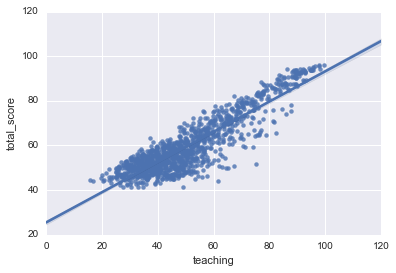

In [20]:
sns.regplot(x='teaching', y = 'total_score', data = unidata)

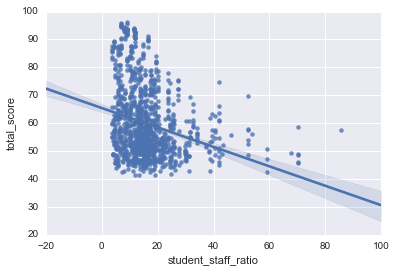

In [22]:
sns.regplot(x='student_staff_ratio', y= 'total_score', data = unidata)

In [24]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
df = unidata[['citations','research','total_score']]
df.replace('-',np.nan,inplace=True)
df.replace(np.inf,np.nan,inplace=True)
df = df.dropna()
lr = linear_model.LinearRegression()
cols = ['citations','research']
x = df[cols]
y = df['total_score']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
lr.predict(x_test)

array([ 51.91309382,  52.69445836,  87.23446024,  65.51861586,
        56.30724403,  47.67482773,  73.70628265,  62.15657003,
        65.69928108,  53.15681435,  54.41720556,  59.21736904,
        65.71252699,  57.76804129,  72.88718335,  57.64123315,
        59.96270954,  55.27029309,  49.38643052,  65.82809219,
        57.50796295,  48.47425189,  62.40453199,  91.83983913,
        49.90487315,  62.78657191,  82.46550709,  75.31756913,
        49.08254281,  49.37473444,  62.37119064,  57.665722  ,
        55.49699723,  52.11042972,  70.40413569,  53.48234733,
        91.65636318,  48.06533269,  55.09224487,  50.32691021,
        52.46972435,  53.15080542,  69.32999833,  55.9350581 ,
        53.17267727,  58.18158047,  45.08409872,  62.38004314,
        45.87767485,  56.82979113,  54.09609883,  49.90632777,
        80.96474552,  39.29509188,  50.68142398,  85.72827093,
        54.14691862,  80.76718305,  46.05811351,  47.9776811 ,
        58.89522798,  52.2390471 ,  55.44472282,  88.28

In [27]:
lr.score(x_test,y_test)

0.961935093141014

In [28]:
lr.score(x_train, y_train)

0.96292945122472562

0    25%
1    27%
2    33%
3    22%
4    27%
5    34%
6    34%
7    15%
8    51%
9    20%
Name: international_students, dtype: object

In [31]:
df2 = unidata[['total_score','international_students']]

In [32]:
df2.head()

,total_score,international_students
0,96.1,25%
1,96.0,27%
2,95.6,33%
3,94.3,22%
4,94.2,27%


In [33]:
df2['international_students'] = map(lambda x: float(str(x).replace('%','')), df2.international_students)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
df2.head()

,total_score,international_students
0,96.1,25.0
1,96.0,27.0
2,95.6,33.0
3,94.3,22.0
4,94.2,27.0


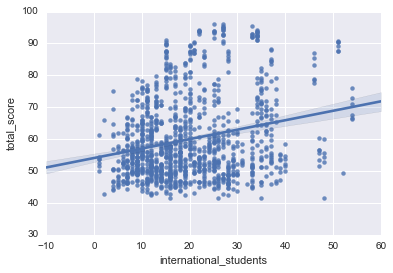

In [35]:
sns.regplot(x='international_students', y='total_score', data=df2)